# PRÁCTICA 4 - AGRUPAMIENTO

### SETUP

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

In [2]:
pen = pd.read_csv("penguins.csv")
df_pen = pen[["species","bill_length_mm","bill_depth_mm"]]

In [3]:
X = df_pen[['bill_length_mm', "bill_depth_mm"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Gráfica de Codo

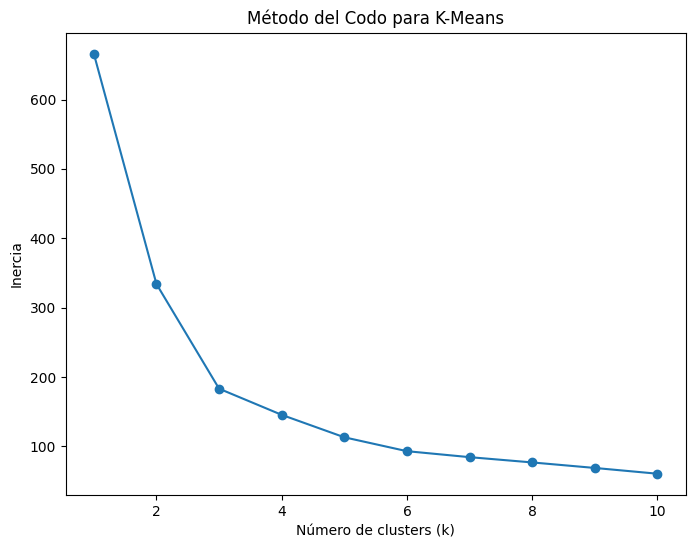

In [4]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.show()

Se aprecia que a partir de k=6 la gráfica sigue una línea recta. Esto concuerda con la distinción entre pingüinos no solo por especie, sino por sexo. Se elige este valor de k para continuar con el modelo de agrupamiento.

### Kmeans

In [5]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pen['cluster'] = kmeans.fit_predict(X_scaled)
df_pen

C:\Users\HP\AppData\Local\Temp\ipykernel_6592\1482508974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pen['cluster'] = kmeans.fit_predict(X_scaled)


,species,bill_length_mm,bill_depth_mm,cluster
0,Adelie,39.1,18.7,2
1,Adelie,39.5,17.4,0
2,Adelie,40.3,18.0,0
3,Adelie,36.7,19.3,2
4,Adelie,39.3,20.6,2
...,...,...,...,...
328,Gentoo,47.2,13.7,4
329,Gentoo,46.8,14.3,4
330,Gentoo,50.4,15.7,1
331,Gentoo,45.2,14.8,4


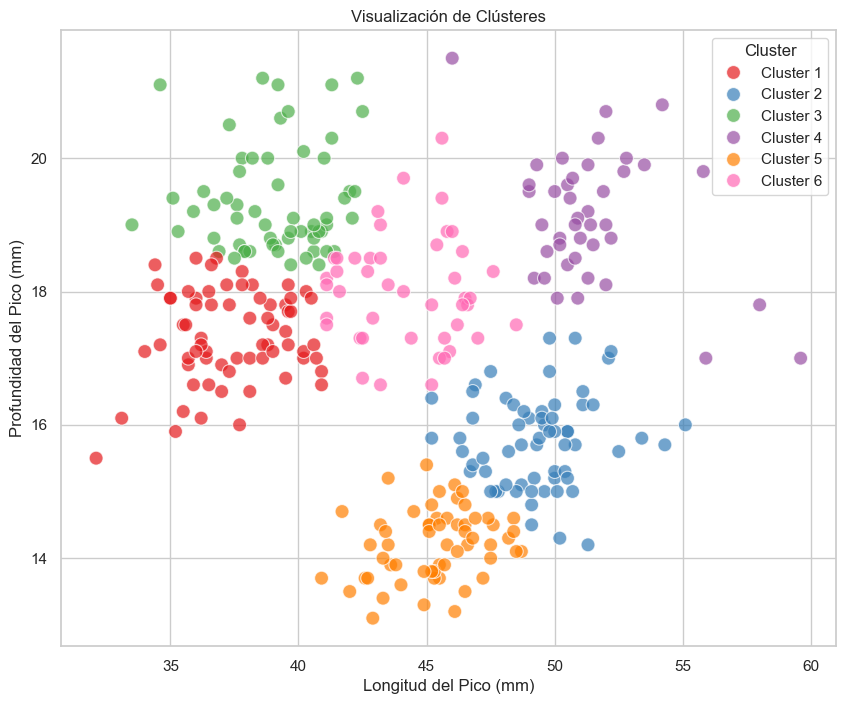

In [8]:
custom_palette = {
    0: '#E41A1C', #Rojo
    1: '#377EB8',  #Azul
    2: '#4DAF4A', #Verde
    3: '#984EA3',  #Morado
    4: '#FF7F00',  #Naranja
    5: '#FF69B4'   #Rosa
}
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
scatter_plot = sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette=custom_palette, data=df_pen, s=100, alpha=0.7)
handles, labels = scatter_plot.get_legend_handles_labels()
cluster_labels = {label: f'Cluster {i+1}' for i, label in enumerate(sorted(df_pen['cluster'].unique()))}
new_labels = [cluster_labels[int(label)] for label in labels]
scatter_plot.set_title('Visualización de Clústeres')
scatter_plot.set_xlabel('Longitud del Pico (mm)')
scatter_plot.set_ylabel('Profundidad del Pico (mm)')
plt.legend(handles=handles, labels=new_labels, title='Cluster')
plt.show()

In [ ]:

pen_c = pen[["species","bill_length_mm","bill_depth_mm","sex"]]
pen_c['species_sex'] = pen_c['species'] + '_' + pen_c['sex']
true_labels = pen_c['species_sex']
homogeneity = homogeneity_score(true_labels, df_pen['cluster'])
completeness = completeness_score(true_labels, df_pen['cluster'])
v_measure = v_measure_score(true_labels, df_pen['cluster'])

print(f'Homogeneidad: {homogeneity:.2f}')
print(f'Completitud: {completeness:.2f}')
print(f'Índice V-measure: {v_measure:.2f}')

Homogeneidad: 0.67
Completitud: 0.66
Índice V-measure: 0.66


C:\Users\HP\AppData\Local\Temp\ipykernel_12620\3159010580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pen_c['species_sex'] = pen_c['species'] + '_' + pen_c['sex']


### Comparación vs Clasificación

Clasificación tomando en cuenta la especie y el sexo de los pingüinos

In [ ]:
le = LabelEncoder()
pen_c['species_sex_encoded'] = le.fit_transform(pen_c['species_sex'])
X = pen_c[['bill_length_mm', 'bill_depth_mm']]
y = pen_c['species_sex_encoded']

C:\Users\HP\AppData\Local\Temp\ipykernel_12620\642910818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pen_c['species_sex_encoded'] = le.fit_transform(pen_c['species_sex'])


In [ ]:
#KNN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)

In [ ]:
# Predicciones
y_pred = knn.predict(X_test)
print("Clasificación KNN:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN: {accuracy:.2f}")

Clasificación KNN:
                  precision    recall  f1-score   support

   Adelie_FEMALE       0.79      0.83      0.81        18
     Adelie_MALE       0.73      0.62      0.67        13
Chinstrap_FEMALE       0.71      0.71      0.71         7
  Chinstrap_MALE       1.00      1.00      1.00         6
   Gentoo_FEMALE       0.92      0.92      0.92        12
     Gentoo_MALE       0.75      0.82      0.78        11

        accuracy                           0.81        67
       macro avg       0.82      0.82      0.82        67
    weighted avg       0.80      0.81      0.80        67

Precisión del modelo KNN: 0.81


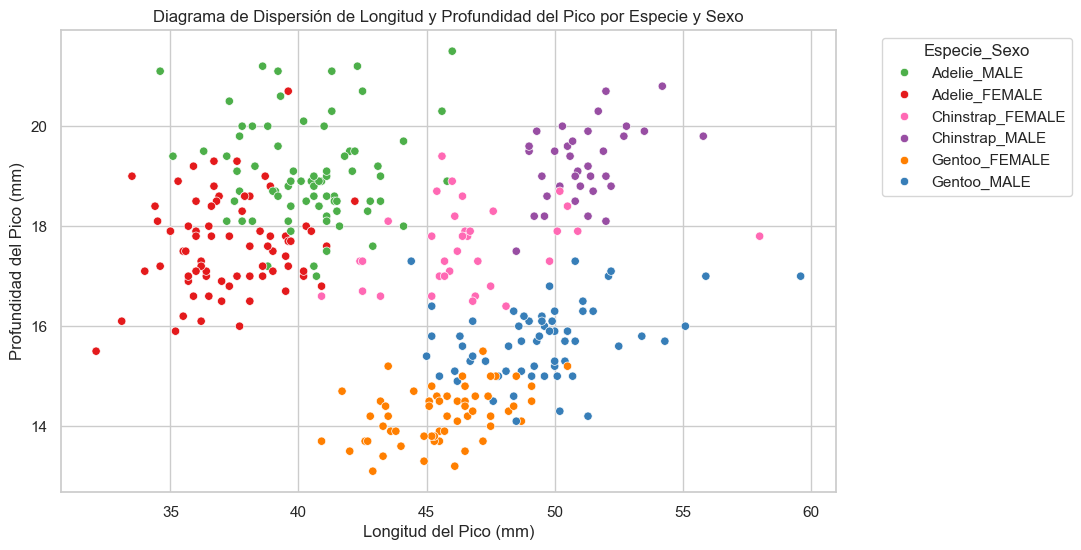

In [ ]:
#Gráfica Real
sns.set(style="whitegrid")
colors = {
    'Adelie_MALE': '#4DAF4A', #Verde
    'Adelie_FEMALE': '#E41A1C', #Rojo
    'Chinstrap_MALE': '#984EA3', #Morado
    'Chinstrap_FEMALE': '#FF69B4', #Rosa
    'Gentoo_MALE': '#377EB8', #Azul
    'Gentoo_FEMALE': '#FF7F00' #Naranja
}

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=pen_c, x='bill_length_mm', y='bill_depth_mm', hue='species_sex', palette=colors)
scatter_plot.set_title('Diagrama de Dispersión de Longitud y Profundidad del Pico por Especie y Sexo')
scatter_plot.set_xlabel('Longitud del Pico (mm)')
scatter_plot.set_ylabel('Profundidad del Pico (mm)')
plt.legend(title='Especie_Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()